# Data Audits

This notebook is used to check and describe the data used in this project. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Import custom project code
import sys
sys.path.append('../bratios')
from paths import DATA_PATHS as dp

### Load Data

In [2]:
# Read datafile with dataset information
data_info = pd.read_csv(dp.make_file_path(dp.eeg_meta, 'MIPDB_PublicFile', 'csv'))

# Load the dataframe of processed data
df = pd.read_csv(dp.make_file_path(dp.eeg_outputs, 'spectral_measures_dataframe', 'csv'))

### Check Data Descriptions

In [3]:
# Check how many subjects are in the total dataset 
n_total = len(data_info['ID'].values)
print('Total number of subjects: \t', n_total)

Total number of subjects: 	 126


In [4]:
# Check descriptive information for participants ages
data_info[['Age']].describe()

,Age
count,126.000000
mean,15.777778
std,8.030829
min,6.000000
25%,10.000000
50%,13.000000
75%,18.000000
max,44.000000


In [5]:
# Check descriptive information for participants reported sex
#   Note that is male is coded as 1 and female is coded as 2
data_info['Sex'].value_counts()

1    69
2    57
Name: Sex, dtype: int64

### Check Subjects

In [6]:
# Check how many subjects we have included
n_included = len(set(df['Subj_ID'].values))
print('Number of included subjects: \t', n_included)

Number of included subjects: 	 111


In [7]:
# Check how many subjects not included in our analysis
n_dropped = n_total - n_included
print('Number of dropped subjects: \t', n_dropped)

Number of dropped subjects: 	 15


In [8]:
# Check how many subject do not have resting state data available
n_missing_data = sum(data_info.EEG_resting == 0)
print('Number of subjects without resting state data: \t', n_missing_data)

Number of subjects without resting state data: 	 9


In [9]:
# Check the IDs of the subjects missing EEG data
missing_data_ids = set(data_info.ID[data_info.EEG_resting == 0].values)
print(missing_data_ids)

{'A00055923', 'A00056990', 'A00056158', 'A00054122', 'A00052593', 'A00055801', 'A00057135', 'A00056733', 'A00056640'}


In [10]:
# Get the list of IDs of subjects we didn't use
dropped_ids = set(data_info.ID.values) - set(df.Subj_ID.values)

In [11]:
# Remove IDs that are listed as having no data
not_used_ids = dropped_ids - missing_data_ids

In [12]:
# Check the remaining subjects not included
print(not_used_ids)

{'A00055623', 'A00056716', 'A00054488', 'A00054866', 'A00055628', 'A00062219'}


### Dropped Subjects

Reasons subjects were not included:
- Missing resting state (001) files: 'A00055628'
    - This subject had no files marked as resting state, despite what was indicated in the README    
- Insufficient events: 'A00062219', 'A00055623', 'A00056716', 'A00054866', 'A00054488'
    - These subjects did not have enough resting state events in the events file
    - Threshold was >1 resting segment of both EO and EC

Note: 1 subject ('A00056733') who was indicated as not having resting state data, did still have files marked as resting (001). However, the event structure was wrong (seems to be a mis-labeled file). This subject was not used. 

## Check FOOOF Model Fits

In [13]:
# Collect a dataframe of the FOOOF model fit metrics
fit_metrics = df[['fit_error', 'fit_r2', 'fit_n_peaks']]

In [14]:
# Check descriptive statistics of the FOOOF model fits
fit_metrics.describe()

,fit_error,fit_r2,fit_n_peaks
count,12321.000000,12321.000000,12321.000000
mean,0.072135,0.973239,5.650678
std,0.014074,0.029509,1.688014
min,0.039322,0.438997,1.000000
25%,0.062379,0.971836,4.000000
50%,0.070136,0.980374,6.000000
75%,0.079510,0.985271,7.000000
max,0.176990,0.995547,8.000000


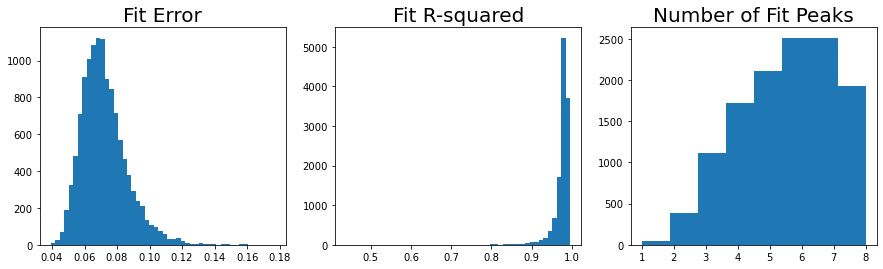

In [15]:
# Plot the distributions of the model fit metrics
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
axes[0].hist(df.fit_error.values, bins=50);
axes[0].set_title('Fit Error', {'fontsize' : 20});
axes[1].hist(df.fit_r2.values, bins=50);
axes[1].set_title('Fit R-squared', {'fontsize' : 20});
axes[2].hist(df.fit_n_peaks.values, bins=8);
axes[2].set_title('Number of Fit Peaks', {'fontsize' : 20});

## Check Averages of Spectral Measures

In [16]:
# Collect a dataframe of the spectral features
feature_labels = ['TBR', 'TAR', 'ABR', 
                  'Theta_CF', 'Theta_PW', 'Theta_BW',
                  'Alpha_CF', 'Alpha_PW', 'Alpha_BW', 
                  'Beta_CF', 'Beta_PW', 'Beta_BW', 
                  'Exp', 'Off']
spect_feats = df[feature_labels]

In [17]:
# Check descriptive statistics of spectral features
spect_feats.describe()

,TBR,TAR,ABR,Theta_CF,Theta_PW,Theta_BW,Alpha_CF,Alpha_PW,Alpha_BW,Beta_CF,Beta_PW,Beta_BW,Exp,Off
count,12321.000000,12321.000000,12321.000000,5067.000000,5067.000000,5067.000000,12105.000000,12105.000000,12105.000000,11817.000000,11817.000000,11817.000000,12321.000000,12321.000000
mean,8.511694,0.962135,13.216227,6.667599,0.441657,1.555350,10.013021,1.093863,1.912328,20.070580,0.453247,2.462513,1.650133,0.888993
std,5.535265,0.785198,11.073253,1.032091,0.213955,0.876935,0.890905,0.439756,0.787350,4.122615,0.187234,1.947134,0.338788,0.644698
min,0.299745,0.062603,0.712065,4.000000,0.041400,1.000000,8.000000,0.082138,1.000000,13.002999,0.066873,1.000000,-0.105688,-1.313748
25%,4.864410,0.424670,5.762063,6.091415,0.282021,1.000000,9.395178,0.774284,1.331410,17.373143,0.309871,1.000000,1.437232,0.429246
50%,6.952779,0.736595,9.805949,6.951273,0.397581,1.218139,9.951750,1.094315,1.764115,19.407149,0.427437,1.572772,1.673483,0.902137
75%,10.453849,1.238249,16.970174,7.480083,0.556682,1.821637,10.523408,1.402803,2.334638,21.667055,0.564374,3.200169,1.887589,1.349454
max,55.762728,8.369810,105.556647,8.000000,1.498937,8.000000,12.992234,2.581061,8.000000,29.999589,1.428894,8.000000,2.781315,2.833057


In [18]:
# Check the correlation between spectral features
spect_feats.corr(method='spearman')

,TBR,TAR,ABR,Theta_CF,Theta_PW,Theta_BW,Alpha_CF,Alpha_PW,Alpha_BW,Beta_CF,Beta_PW,Beta_BW,Exp,Off
TBR,1.000000,0.358930,0.364548,-0.031821,0.327864,0.202392,-0.318347,-0.003941,-0.011659,-0.071154,-0.249461,-0.072753,0.744836,0.672192
TAR,0.358930,1.000000,-0.693089,-0.234413,-0.102681,0.064598,-0.134030,-0.877698,-0.176553,0.141651,-0.370192,-0.154379,0.208044,0.185648
ABR,0.364548,-0.693089,1.000000,0.204467,0.312204,0.078497,-0.137411,0.873014,0.148142,-0.172101,0.203259,0.117553,0.346863,0.316283
Theta_CF,-0.031821,-0.234413,0.204467,1.000000,0.511269,0.214914,0.069917,0.214538,-0.083672,-0.033903,0.109835,0.035359,0.041325,0.043807
Theta_PW,0.327864,-0.102681,0.312204,0.511269,1.000000,0.315205,-0.119801,0.269187,0.029363,-0.120050,0.214798,0.129590,0.196609,0.185847
Theta_BW,0.202392,0.064598,0.078497,0.214914,0.315205,1.000000,-0.003604,0.068183,-0.077278,-0.008208,0.117868,0.036944,0.126537,0.141610
Alpha_CF,-0.318347,-0.134030,-0.137411,0.069917,-0.119801,-0.003604,1.000000,-0.004023,-0.072133,0.125642,-0.018923,-0.075088,-0.175578,-0.185591
Alpha_PW,-0.003941,-0.877698,0.873014,0.214538,0.269187,0.068183,-0.004023,1.000000,0.088006,-0.157759,0.434078,0.200499,0.090968,0.088702
Alpha_BW,-0.011659,-0.176553,0.148142,-0.083672,0.029363,-0.077278,-0.072133,0.088006,1.000000,-0.136652,0.101923,0.051689,0.022759,-0.001486
Beta_CF,-0.071154,0.141651,-0.172101,-0.033903,-0.120050,-0.008208,0.125642,-0.157759,-0.136652,1.000000,-0.155469,-0.129101,-0.196717,-0.132648
